In [2]:
import pandas as pd
from numpy.random import choice
from scipy.stats import norm
import numpy as np

df = pd.read_csv("data/player_stats.csv")
df[df["yearID"] == 2020].head()
df = df[df["leagueID"] == "NL"]
df = df[["playerID", "br_WAR_total", "salary"]]
# get rows where no column has NaN
df = df.dropna()
# keep unique playerID and keep the first if duplicates are found
df = df.drop_duplicates(subset="playerID", keep="first")
df = df.sort_values(by="br_WAR_total", ascending=False).reset_index()

In [2]:
df.shape

(3100, 4)

In [3]:
#sort df by descending war_score
def sample_uniform(df, sample_size, budget):
    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int

    for i in range(SAMPLE_SIZE):
        sample = df.sample(n=25, replace=False)

        if sum(sample["br_WAR_total"]) > max_war and sum(sample["salary"]) <= BUDGET:
            max_war = sum(sample["br_WAR_total"])

    return max_war

In [4]:
# USING OVERSAMPLING
#sort df by descending war_score

def sample_over(df, sample_size, budget):
    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int
    normalized = df["br_WAR_total"] + abs(min(df["br_WAR_total"]))
    for i in range(SAMPLE_SIZE):
        sample = choice(list(range(len(df))), 25, p=normalized/sum(normalized), replace=False)

        if sum(df.iloc[sample]["br_WAR_total"]) > max_war and sum(df.iloc[sample]["salary"]) <= BUDGET:
            max_war = sum(df.iloc[sample]["br_WAR_total"])

    return max_war

In [5]:
def sample_multistage(df, sample_size, budget, frac=0.2):
    df1 = df.iloc[:int(len(df)*frac)]
    df1 = df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_uniform(df2, sample_size, budget)

In [6]:
def sample_multistage_oversample(df, sample_size, budget, frac=0.2):
    df1 = df.iloc[:int(len(df)*frac)]
    df1 = df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_over(df2, sample_size, budget)

In [14]:
BUDGET = 50000000
SAMPLE_SIZE = 1000

print("Uniform: ", sample_uniform(df, SAMPLE_SIZE, BUDGET))
print("Oversample: ",sample_over(df, SAMPLE_SIZE, BUDGET))
print("Multistage: ", sample_multistage(df, SAMPLE_SIZE, BUDGET))
print("Oversampled Multistage: ", sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))

Uniform:  44.199999999999996
Oversample:  55.33999999999999
Multistage:  95.24
Oversampled Multistage:  105.40999999999998


In [15]:
samples = {"Uniform": [], "Oversample": [], "Multistage": [], "Oversampled Multistage": []}
BUDGET = 50000000
SAMPLE_SIZE = 1000

for i in range(1000):
    print(i+1, end=" ")
    samples["Uniform"].append(sample_uniform(df, SAMPLE_SIZE, BUDGET))
    samples["Oversample"].append(sample_over(df, SAMPLE_SIZE, BUDGET))
    samples["Multistage"].append(sample_multistage(df, SAMPLE_SIZE, BUDGET))
    samples["Oversampled Multistage"].append(sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [3]:
# what is monte carlo simulation? a: a way to simulate a random process over and over again to get a better understanding of the process and its outcomes
BUDGET = 50000000
def monte_carlo_sample(df, sample_size):
    sample = None
    while sample == None:
        df = df.sample(n=sample_size, replace=False)
        if sum(df["salary"]) <= BUDGET:
            sample = sum(df["br_WAR_total"])
            return sample


vals = [sum(df["br_WAR_total"].sample(n=25, replace=False)) for _ in range(10000000)]


(array([6.60000e+01, 8.16000e+02, 5.61100e+03, 2.40920e+04, 6.61520e+04,
        1.23772e+05, 1.71214e+05, 1.84287e+05, 1.62073e+05, 1.17722e+05,
        7.32510e+04, 3.96950e+04, 1.85510e+04, 8.11000e+03, 3.04400e+03,
        1.05700e+03, 3.56000e+02, 9.90000e+01, 2.00000e+01, 1.20000e+01]),
 array([-11.59 ,  -8.036,  -4.482,  -0.928,   2.626,   6.18 ,   9.734,
         13.288,  16.842,  20.396,  23.95 ,  27.504,  31.058,  34.612,
         38.166,  41.72 ,  45.274,  48.828,  52.382,  55.936,  59.49 ]),
 <BarContainer object of 20 artists>)

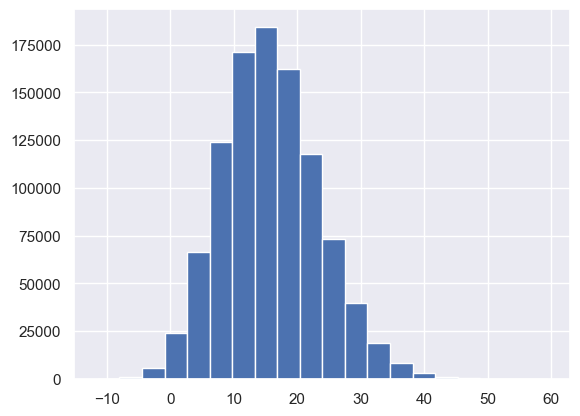

In [48]:
# hist of vals
import matplotlib.pyplot as plt
plt.hist(vals, bins=20)

In [17]:
#pickle samples
import pickle
with open("samples.pickle", "wb") as f:
    pickle.dump(samples, f) 

/var/folders/wf/qqh5t_mj4yd34krx803q420c0000gn/T/ipykernel_33575/181766258.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples[key], label=key, bins=20)
/var/folders/wf/qqh5t_mj4yd34krx803q420c0000gn/T/ipykernel_33575/181766258.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample

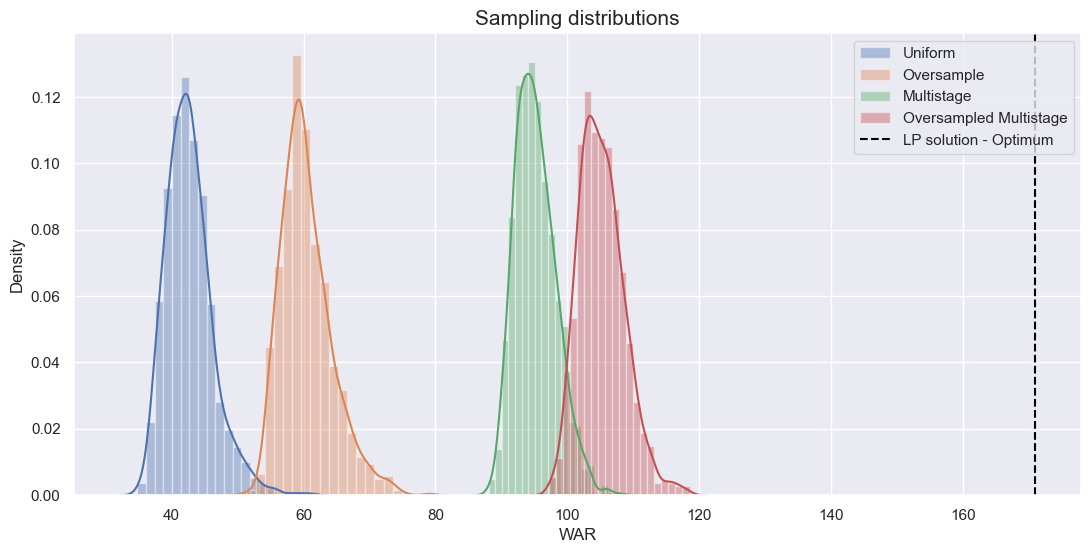

In [18]:
ground_truth = 171

# Plot the samples as histograms 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
sns.set()

fig, ax = plt.subplots(figsize=(13, 6))
for key in samples:
    sns.distplot(samples[key], label=key, bins=20)
# Plot ground truth as a vertical line
ax.axvline(ground_truth, color="black", linestyle="--", label = "LP solution - Optimum")
# legend with legend position
ax.legend()
# Add title
ax.set_title("Sampling distributions", size = 15)
# Add x-axis label
ax.set_xlabel("WAR")
# Add y-axis label
ax.set_ylabel("Density")
plt.show()

In [19]:
# save figure to viz folder
fig.savefig("viz/sampling_distributions_oliver.png")

In [20]:
# Do it a lot of times
samples = {"Uniform": [], "Oversample": [], "Multistage": [], "Oversampled Multistage": []}

sample_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800]

means = {"Uniform": [], "Oversample": [], "Multistage": [], "Oversampled Multistage": []}

for SAMPLE_SIZE in sample_sizes:
    print("SAMPLE SIZE: ", SAMPLE_SIZE)
    BUDGET = 50000000


    for i in range(100):
        print(i+1, end=" ")
        samples["Uniform"].append(sample_uniform(df, SAMPLE_SIZE, BUDGET))
        samples["Oversample"].append(sample_over(df, SAMPLE_SIZE, BUDGET))
        samples["Multistage"].append(sample_multistage(df, SAMPLE_SIZE, BUDGET))
        samples["Oversampled Multistage"].append(sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))
    
    means["Uniform"].append(np.mean(samples["Uniform"]))
    means["Oversample"].append(np.mean(samples["Oversample"]))
    means["Multistage"].append(np.mean(samples["Multistage"]))
    means["Oversampled Multistage"].append(np.mean(samples["Oversampled Multistage"]))

SAMPLE SIZE:  100
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 SAMPLE SIZE:  200
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 SAMPLE SIZE:  400
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 SAMPLE SIZE:  800
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 2